<a href="https://colab.research.google.com/github/vineeta07/mlproject-stockpriceprediction/blob/main/stockpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<u>DEPARTMENT OF COMPUTER SCIENCE AND ENGINEERING </U>

##<u>**<center>MACHINE LEARNING PROJECT</center>**</u>





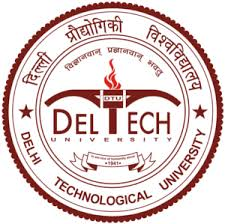

<u>**<center>PROJECT FILE</center>**</u>

<u>SUBMITTED TO :</u>


  Mr.Gapesh Kumar
    

<u>SUBMITTED BY :</u>
   <br>  YASHASHVI YADAV         (24/A07/070)</br>
  VIDHI                        (24/A07/051)</br>
   VINEETA KUMARI MEENA    (24/A07/056)</br>


##**Topic: Stock price prediction using LSTM**

**1. Objective / Task**

The main objective of this project is to build a Machine Learning model that can predict the future stock prices of a company based on its past data.
  
This project is based on the concept of supervised machine learning where the model is trained using historical stock price data.
  
Stock price prediction is a very interesting and practical use case of Machine Learning as stock market analysis is very important in the real world for investors and businesses.
  
In this project, I have used Linear Regression model to predict the closing price of stock. The main task was to collect the data, preprocess it properly, train the model and then use it for predicting future stock prices.

**2. Theory**

<u>*Dataset Used:*</u>

In this project, I have used the stock price dataset of companies .
  
The dataset was downloaded in CSV (Comma Separated Values) format and contains the following columns:
 - Date
 - Open Price
 - High Price
 - Low Price
 - Close Price
 - Adj Close Price
 - Volume
  
Out of these, I have mainly used two columns:
 - Date — It represents the date on which the stock data was recorded.
 - Close — It is the closing price of the stock on that particular day. This is the value which I have predicted using Machine Learning.

<u>*Data Preprocessing:*</u>

Data Preprocessing is a very important step in any Machine Learning project. In my project, I have done the following steps for preprocessing the dataset:
  
1. Loading the Data:
 I have used the Pandas library to load the dataset from the CSV file into a Data Frame.
  
2. Handling Missing Values:
 I checked whether there are any null or missing values. In my dataset there were no missing values.
  
3. Converting Date Column:
 I converted the Date column into numerical format using toordinal() function of Python.
  
4. Splitting Data:
 I separated the independent and dependent variables as:
 X → Date column (Input feature)
 y → Close Price column (Target variable)

<u>*Model Used:*</u>

I have used Linear Regression model from sklearn library.
  
Linear Regression is one of the simplest and most basic machine learning algorithms. It is used to predict a continuous dependent variable based on the value of independent variable(s).

<u>*Evaluation Metric Used:*</u>

To check how good my model is performing, I used Mean Squared Error (MSE) as the evaluation metric.
  
MSE measures the average of the squares of the errors — that is, the average squared difference between the actual value and the predicted value.

<u>*Visualization:*</u>

To visualize how well my model has predicted the stock prices, I plotted a graph between the Actual Stock Prices and Predicted Stock Prices using the Matplotlib library.

**Implementation starts:**

**1. Imports:**

In [1]:
import pandas
import numpy
import matplotlib
import keras
import sklearn
print(f"Pandas version: {pandas.__version__}")
print(f"NumPy version: {numpy.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Keras version: {keras.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")

Pandas version: 2.2.2
NumPy version: 2.0.2
Matplotlib version: 3.10.0
Keras version: 3.8.0
Scikit-learn version: 1.6.1


In [2]:
import pandas as pd
import numpy as np
from tensorflow import keras


import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM, Dropout ,Dense


from sklearn.preprocessing import MinMaxScaler

In [3]:
!unzip NSE-Tata-Global-Beverages-Limited.zip

Archive:  NSE-Tata-Global-Beverages-Limited.zip
  inflating: NSE-Tata-Global-Beverages-Limited.csv  


In [4]:
!unzip  stock_data.zip

Archive:  stock_data.zip
  inflating: stock_data.csv          


In [5]:
!unzip Stock-Price-Prediction-Project-Code.zip

Archive:  Stock-Price-Prediction-Project-Code.zip
  inflating: stock_pred.py           
  inflating: stock_app.py            


**2. Read the dataset:**

In [6]:
df=pd.read_csv("NSE-Tata-Global-Beverages-Limited.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


**3. Analyze the closing prices from dataframe:**

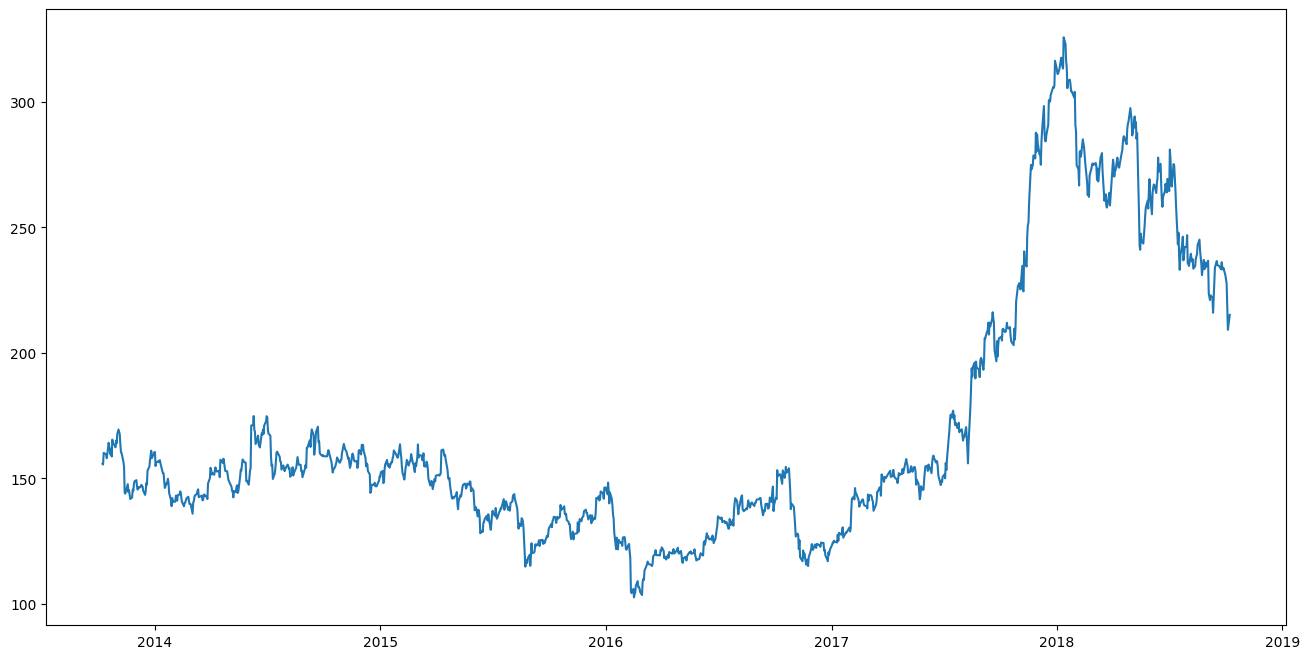

In [7]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

**4. Sort the dataset on date time and filter “Date” and “Close” columns:**

In [8]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset.loc[i,"Date"]=data.iloc[i]['Date']
    new_dataset.loc[i,"Close"]=data.iloc[i]["Close"]

**5. Normalize the new filtered dataset:**



In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset[['Close']].values

train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

# Reset index to default and include 'Date' column
new_dataset_indexed = new_dataset.reset_index()

# Set index using the 'Date' column
new_dataset_indexed.index = new_dataset_indexed.Date

#Select 'Close' for scaling
new_dataset_indexed = new_dataset_indexed[['Close']]


scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7631: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(index_like, name=name, copy=copy)


**6. Build and train the LSTM model:**

In [10]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:]['Close'].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


927/927 - 9s - 10ms/step - loss: 0.0010


**7. Take a sample of a dataset to make stock price predictions using the LSTM model:**

In [11]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


**8. Save the LSTM model:**

In [12]:
lstm_model.save("saved_model.keras")

**9. Visualize the predicted stock costs with actual stock costs:**

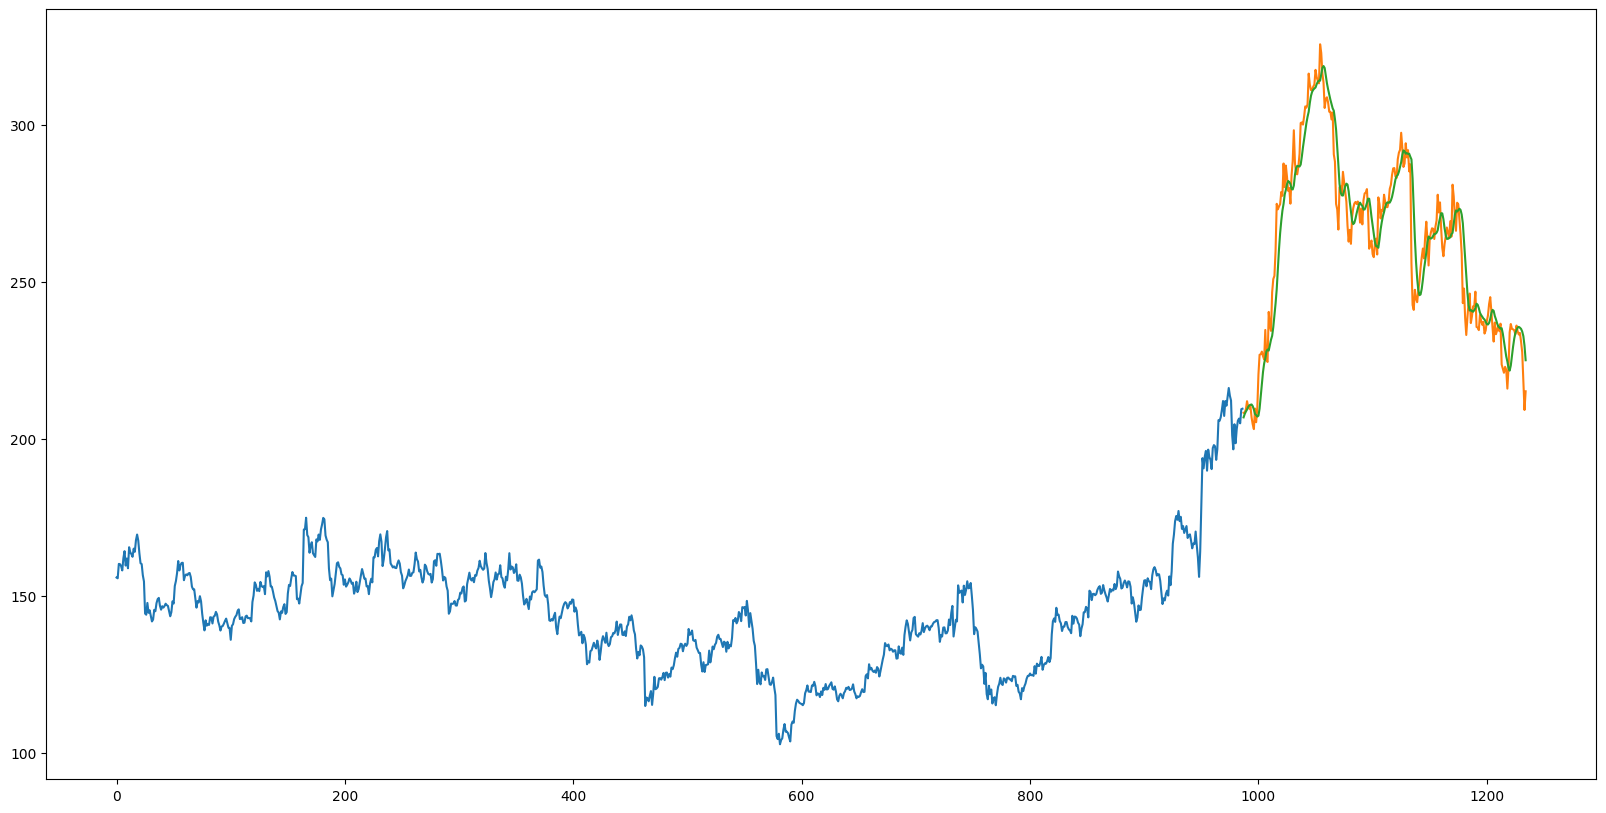

In [13]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:].copy()


valid_data.loc[:,'Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

You can observe that LSTM has predicted stocks almost similar to actual stocks.

In this section, we will build a dashboard to analyze stocks. Dash is a python framework that provides an abstraction over flask and react.js to build analytical web applications.
Before moving ahead, you need to install dash. Run the below command in the terminal.

In [ ]:
!pip3 install dash
!pip3 install dash-html-components
!pip3 install dash-core-components

In [15]:
import dash
from dash import dcc
from dash import html
import pandas as pd
import plotly.graph_objs as go
from dash.dependencies import Input, Output
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np


app = dash.Dash()
server = app.server

scaler=MinMaxScaler(feature_range=(0,1))

df_nse = pd.read_csv("NSE-Tata-Global-Beverages-Limited.csv")

df_nse["Date"]=pd.to_datetime(df_nse.Date,format="%Y-%m-%d")
df_nse.index=df_nse['Date']


data=df_nse.sort_index(ascending=True,axis=0)
new_data=pd.DataFrame(index=range(0,len(df_nse)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_data.loc[i,"Date"]=data['Date'].iloc[i]
    new_data.loc[i,"Close"]=data["Close"].iloc[i]

new_data.index=new_data.Date
new_data.drop("Date",axis=1,inplace=True)


dataset=new_data.values

train=dataset[0:987,:]
valid=dataset[987:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

x_train,y_train=[],[]

for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

model=load_model("saved_model.keras")

inputs=new_data[len(new_data)-len(valid)-60:].values
inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

X_test=[]
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

train=new_data[:987]
valid=new_data[987:].copy()
valid.loc[:,'Predictions']=closing_price



df= pd.read_csv("./stock_data.csv")

app.layout = html.Div([

    html.H1("Stock Price Analysis Dashboard", style={"textAlign": "center"}),

    dcc.Tabs(id="tabs", children=[

        dcc.Tab(label='NSE-TATAGLOBAL Stock Data',children=[
            html.Div([
                html.H2("Actual closing price",style={"textAlign": "center"}),
                dcc.Graph(
                    id="Actual Data",
                    figure={
                        "data":[
                            go.Scatter(
                                x=train.index,
                                y=valid["Close"],
                                mode='markers'
                            )

                        ],
                        "layout":go.Layout(
                            title='scatter plot',
                            xaxis={'title':'Date'},
                            yaxis={'title':'Closing Rate'}
                        )
                    }

                ),
                html.H2("LSTM Predicted closing price",style={"textAlign": "center"}),
                dcc.Graph(
                    id="Predicted Data",
                    figure={
                        "data":[
                            go.Scatter(
                                x=valid.index,
                                y=valid["Predictions"],
                                mode='markers'
                            )

                        ],
                        "layout":go.Layout(
                            title='scatter plot',
                            xaxis={'title':'Date'},
                            yaxis={'title':'Closing Rate'}
                        )
                    }

                )
            ])


        ]),
        dcc.Tab(label='Facebook Stock Data', children=[
            html.Div([
                html.H1("Facebook Stocks High vs Lows",
                        style={'textAlign': 'center'}),

                dcc.Dropdown(id='my-dropdown',
                             options=[{'label': 'Tesla', 'value': 'TSLA'},
                                      {'label': 'Apple','value': 'AAPL'},
                                      {'label': 'Facebook', 'value': 'FB'},
                                      {'label': 'Microsoft','value': 'MSFT'}],
                             multi=True,value=['FB'],
                             style={"display": "block", "margin-left": "auto",
                                    "margin-right": "auto", "width": "60%"}),
                dcc.Graph(id='highlow'),
                html.H1("Facebook Market Volume", style={'textAlign': 'center'}),

                dcc.Dropdown(id='my-dropdown2',
                             options=[{'label': 'Tesla', 'value': 'TSLA'},
                                      {'label': 'Apple','value': 'AAPL'},
                                      {'label': 'Facebook', 'value': 'FB'},
                                      {'label': 'Microsoft','value': 'MSFT'}],
                             multi=True,value=['FB'],
                             style={"display": "block", "margin-left": "auto",
                                    "margin-right": "auto", "width": "60%"}),
                dcc.Graph(id='volume')
            ], className="container"),
        ])


    ])
])


@app.callback(Output('highlow', 'figure'),
              [Input('my-dropdown', 'value')])
def update_graph(selected_dropdown):
    dropdown = {"TSLA": "Tesla","AAPL": "Apple","FB": "Facebook","MSFT": "Microsoft",}
    trace1 = []
    trace2 = []
    for stock in selected_dropdown:
        trace1.append(
          go.Scatter(x=df[df["Stock"] == stock]["Date"],
                     y=df[df["Stock"] == stock]["High"],
                     mode='lines', opacity=0.7,
                     name=f'High {dropdown[stock]}',textposition='bottom center'))
        trace2.append(
          go.Scatter(x=df[df["Stock"] == stock]["Date"],
                     y=df[df["Stock"] == stock]["Low"],
                     mode='lines', opacity=0.6,
                     name=f'Low {dropdown[stock]}',textposition='bottom center'))
    traces = [trace1, trace2]
    data = [val for sublist in traces for val in sublist]
    figure = {'data': data,
              'layout': go.Layout(colorway=["#5E0DAC", '#FF4F00', '#375CB1',
                                            '#FF7400', '#FFF400', '#FF0056'],
            height=600,
            title=f"High and Low Prices for {', '.join(str(dropdown[i]) for i in selected_dropdown)} Over Time",
            xaxis={"title":"Date",
                   'rangeselector': {'buttons': list([{'count': 1, 'label': '1M',
                                                       'step': 'month',
                                                       'stepmode': 'backward'},
                                                      {'count': 6, 'label': '6M',
                                                       'step': 'month',
                                                       'stepmode': 'backward'},
                                                      {'step': 'all'}])},
                   'rangeslider': {'visible': True}, 'type': 'date'},
             yaxis={"title":"Price (USD)"})}
    return figure


@app.callback(Output('volume', 'figure'),
              [Input('my-dropdown2', 'value')])
def update_graph(selected_dropdown_value):
    dropdown = {"TSLA": "Tesla","AAPL": "Apple","FB": "Facebook","MSFT": "Microsoft",}
    trace1 = []
    for stock in selected_dropdown_value:
        trace1.append(
          go.Scatter(x=df[df["Stock"] == stock]["Date"],
                     y=df[df["Stock"] == stock]["Volume"],
                     mode='lines', opacity=0.7,
                     name=f'Volume {dropdown[stock]}', textposition='bottom center'))
    traces = [trace1]
    data = [val for sublist in traces for val in sublist]
    figure = {'data': data,
              'layout': go.Layout(colorway=["#5E0DAC", '#FF4F00', '#375CB1',
                                            '#FF7400', '#FFF400', '#FF0056'],
            height=600,
            title=f"Market Volume for {', '.join(str(dropdown[i]) for i in selected_dropdown_value)} Over Time",
            xaxis={"title":"Date",
                   'rangeselector': {'buttons': list([{'count': 1, 'label': '1M',
                                                       'step': 'month',
                                                       'stepmode': 'backward'},
                                                      {'count': 6, 'label': '6M',
                                                       'step': 'month',
                                                       'stepmode': 'backward'},
                                                      {'step': 'all'}])},
                   'rangeslider': {'visible': True}, 'type': 'date'},
             yaxis={"title":"Transactions Volume"})}
    return figure


if __name__=='__main__':
    app.run(debug=True)

/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7631: FutureWarning:

Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


<IPython.core.display.Javascript object>

**3. Result and Conclusion**

<u>*Result:*</u>

The model was successfully trained on the stock price dataset.
  
The Mean Squared Error value obtained was reasonably small, which means the model made good predictions.
  
The graph plotted between Actual Prices and Predicted Prices showed that most of the predicted values were close to the actual values.

<u>*Conclusion:*</u>

In this project, I have learned how to implement a real-world Machine Learning project from scratch.
  
I performed all the important steps like data preprocessing, feature selection, model training, prediction, evaluation and visualization.
  
Linear Regression worked well for predicting stock prices based on the past data.
  
This project helped me understand how Machine Learning models work practically, and how important it is to prepare the dataset properly.
  


**4. Acknowledgement**

I would like to express my sincere gratitude to our Machine Learning faculty for giving us the opportunity to work on this project. This project helped me to practically implement the concepts of Machine Learning that I have learnt in class.
  
I would also like to thank my friends and classmates for their constant support and motivation throughout the project.

**5. References**

1. https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python/

2. https://www.youtube.com/watch?v=1O_BenficgE




